In [1]:
# External libraries:
import numpy as np
from sklearn.model_selection import train_test_split

# Internal libraries:
import datasets.data as data
from descent_algorithms import *
from learning_rates import *
from models import *
from util import *

features, labels = data.load_wisconsin_breast_cancer()
wbc_X_train, wbc_X_test, wbc_y_train, wbc_y_test = train_test_split(
    features, labels, test_size=0.2)
wbc_n = wbc_X_train.shape[0]
wbc_y_train = zero_one_labels_to_signed(wbc_y_train)
wbc_y_test = zero_one_labels_to_signed(wbc_y_test)

M_features, M_labels = data.load_MNIST_13()
mnist_X_train, mnist_X_test, mnist_y_train, mnist_y_test = train_test_split(
    M_features, M_labels, test_size = 0.2)
mnist_n = mnist_X_train.shape[0]
mnist_y_train = zero_one_labels_to_signed(mnist_y_train)
mnist_y_test = zero_one_labels_to_signed(mnist_y_test)

cod_features, cod_labels = data.load_cod_rna()
cod_X_train, cod_X_test, cod_y_train, cod_y_test = train_test_split(
    cod_features, cod_labels, test_size = 0.2)
cod_n = cod_X_train.shape[0]
cod_y_train = zero_one_labels_to_signed(cod_y_train)
cod_y_test = zero_one_labels_to_signed(cod_y_test)

# relative convergence limit
rel_conv = 0.000001

Using TensorFlow backend.


Fitting gradient descent:
Iter:        0 train loss: 417.109
Iter:     2000 train loss: 0.743
Iter:     4000 train loss: 0.593
Iter:     6000 train loss: 2.650
Iter:     8000 train loss: 0.706
Iter:    10000 train loss: 0.720
Iter:    12000 train loss: 0.571
Iter:    14000 train loss: 1.294
Converged in 14698 iterations.

Fitting stochastic gradient descent, batch size = 100:
Iter:        0 train loss: 558.153
Iter:     2000 train loss: 21.626
Iter:     4000 train loss: 13.023
Iter:     6000 train loss: 7.162
Iter:     8000 train loss: 3.024
Iter:    10000 train loss: 0.435
Iter:    12000 train loss: 0.476
Iter:    14000 train loss: 0.523
Iter:    16000 train loss: 0.475
Iter:    18000 train loss: 0.488

Fitting accelerated gradient descent:
Iter:        0 train loss: 1.000
Iter:     2000 train loss: 3.678
Iter:     4000 train loss: 2.790
Iter:     6000 train loss: 2.381
Iter:     8000 train loss: 1.363
Iter:    10000 train loss: 1.932
Iter:    12000 train loss: 12.337
Iter:    14000 t

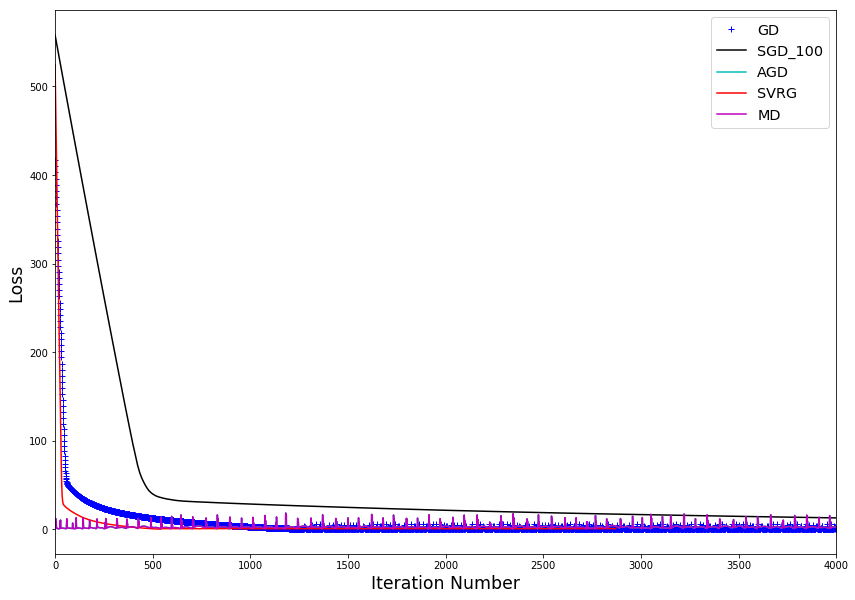

In [2]:
# initialize our learning rate object
lr = FixedRate(0.001)

# initialize our descent methods
gd = GradientDescent()
sgd_100 = GradientDescent()
agd = NesterovAcceleratedDescent()
svrg = StochasticVarianceReducedGradientDescent()
md = MirrorDescent()
c = 0.001
# initialize all of the SVM models
gd_svm = SVM(gd, lr, c, 20000, wbc_n, rel_conv)
sgd_100_svm = SVM(sgd_100, lr, c, 20000, 100, rel_conv)
agd_svm = SVM(agd, lr, c, 20000, wbc_n, rel_conv)
svrg_svm = SVM(svrg, lr, c, 3000, wbc_n, rel_conv)
md_svm = SVM(md, lr, c, 2000, wbc_n, rel_conv)

# run fitting for all of the models
print('Fitting gradient descent:')
wbc_gd_loss = gd_svm.fit(wbc_X_train, wbc_y_train)
print('\nFitting stochastic gradient descent, batch size = 100:')
wbc_sgd_100_loss = sgd_100_svm.fit(wbc_X_train, wbc_y_train)
print('\nFitting accelerated gradient descent:')
wbc_agd_loss = agd_svm.fit(wbc_X_train, wbc_y_train)
print('\nFitting stochastic variance reduced gradient descent:')
wbc_svrg_loss = svrg_svm.fit(wbc_X_train, wbc_y_train)
print('\nFitting mirror descent:')
wbc_md_loss = md_svm.fit(wbc_X_train, wbc_y_train)

# print test accuracies
acc = check_accuracy_svm(gd_svm, wbc_X_test, wbc_y_test)
print("GD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(sgd_100_svm, wbc_X_test, wbc_y_test)
print("SGD 100 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(agd_svm, wbc_X_test, wbc_y_test)
print("AGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(svrg_svm, wbc_X_test, wbc_y_test)
print("SVRG Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(md_svm, wbc_X_test, wbc_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))

plot_fixed_svm_losses(wbc_gd_loss, wbc_sgd_100_loss, wbc_agd_loss, wbc_svrg_loss, wbc_agd_loss)

Fitting gradient descent:
Iter:        0 train loss: 525.316
Converged in 461 iterations.

Fitting stochastic gradient descent, batch size = 1:
Iter:        0 train loss: 482.273
Converged in 101 iterations.

Fitting mirror descent:
Iter:        0 train loss: 25.276
Converged in 682 iterations.


GD Accuracy: 86.43%
SGD 1 Accuracy: 36.43%
MD Accuracy: 87.14%


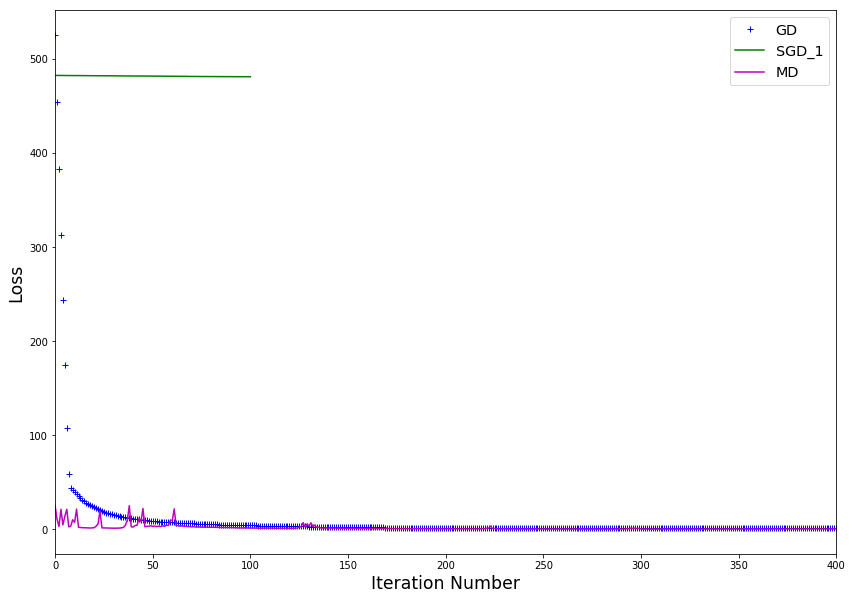

In [19]:
# initialize our learning rate object
lr_gd = PolyDecayRate(0.01, 0.0001)
lr_sgd = PolyDecayRate(0.001, 0.00001)
lr_md = PolyDecayRate(0.001, 0.00001)
# initialize our descent methods
gd = GradientDescent()
sgd_1 = GradientDescent()
md = MirrorDescent()
# initialize logistic regression models
gd_log = SVM(gd, lr_gd, c, 10000, wbc_n, rel_conv)
sgd_1_log = SVM(sgd_1, lr_sgd, c, 10000, 1, rel_conv)
md_log = SVM(md, lr_md, c, 10000, wbc_n, rel_conv)
# fit the models...
print('Fitting gradient descent:')
wbc_gd_loss = gd_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting stochastic gradient descent, batch size = 1:')
wbc_sgd_1_loss = sgd_1_log.fit(wbc_X_train, wbc_y_train)
print('\nFitting mirror descent:')
wbc_md_loss = md_log.fit(wbc_X_train, wbc_y_train)
# print the test accuracies for each model
acc = check_accuracy_svm(gd_log, wbc_X_test, wbc_y_test)
print("\n\nGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(sgd_1_log, wbc_X_test, wbc_y_test)
print("SGD 1 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(md_log, wbc_X_test, wbc_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))
# plot the loss convergences for each model
plot_dynamic_losses(wbc_gd_loss, wbc_sgd_1_loss, wbc_md_loss)